In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/sf_csv/atom/concat_Si.csv'

In [35]:
df = pd.read_csv(csv_path)
df = df[df.structure == 'stishovite']
df.columns
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)

descriptor_labels
target_label ='E_atom'
df

,Unnamed: 0,another_atom,center_atom,structure_idx,structure,sf_Si-O_e-6.629_rs-1.5,sf_Si-O_e-4.183_rs-1.888,sf_Si-O_e-2.639_rs-2.377,sf_Si-O_e-1.665_rs-2.993,sf_Si-O_e-1.051_rs-3.768,...,sf_Si-Si_e-1.051_rs-3.768,sf_Si-Si_e-0.6629_rs-4.743,sf_Si-Si_e-0.4183_rs-5.972,sf_Si-Si_e-0.2639_rs-7.518,sf_Si-Si_e-0.1665_rs-9.464,sf_Si-Si_e-0.1051_rs-11.91,natom,E,Vol,E_atom
0,0,O,Si,422,stishovite,71.715255,96.149520,73.447162,234.417434,469.585341,...,431.476589,773.092811,1327.896292,1923.382677,2209.134662,1633.421016,48,-1011.339748,345.233252,-21.069578
1,1,O,Si,422,stishovite,71.793836,96.397413,74.400054,245.726338,468.764814,...,431.563653,774.572793,1318.506067,1925.791918,2220.633408,1637.294211,48,-1011.339748,345.233252,-21.069578
2,2,O,Si,422,stishovite,76.395436,89.895552,64.044328,237.491462,476.404977,...,443.666489,772.975997,1318.912055,1928.209339,2212.778414,1636.015764,48,-1011.339748,345.233252,-21.069578
3,3,O,Si,422,stishovite,79.751773,93.961960,67.441486,238.479188,472.321034,...,461.211306,776.638874,1308.044308,1914.641547,2213.773874,1639.233388,48,-1011.339748,345.233252,-21.069578
4,4,O,Si,422,stishovite,75.138004,88.705371,70.786060,246.376390,466.666355,...,439.951513,768.437795,1313.607194,1921.775988,2215.622802,1634.746799,48,-1011.339748,345.233252,-21.069578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,11195,O,Si,439,stishovite,49.198236,104.847217,87.496304,251.016507,475.291624,...,445.895277,781.633716,1327.264394,1916.254894,2211.405639,1637.149877,48,-1010.777891,345.233252,-21.057873
11196,11196,O,Si,439,stishovite,74.328752,88.317693,71.858262,235.151371,460.706253,...,457.385197,792.335583,1330.198231,1912.211349,2205.216301,1633.743093,48,-1010.777891,345.233252,-21.057873
11197,11197,O,Si,439,stishovite,68.324987,82.578882,68.066952,249.557038,481.397318,...,457.798687,788.428859,1328.929375,1910.400914,2204.160883,1634.252508,48,-1010.777891,345.233252,-21.057873
11198,11198,O,Si,439,stishovite,63.904043,97.803845,75.634824,236.428018,481.940972,...,446.599520,775.567281,1319.296368,1911.847096,2208.794050,1636.704746,48,-1010.777891,345.233252,-21.057873


In [36]:
# fig, ax = plt.subplots()
# structures = df.structure.unique()
# for structure in structures:
#     plt.scatter(x=df[df.structure == structure].structure_idx,y=df[df.structure == structure][descriptor_labels[0]],label=structure)
#     plt.legend()
#     plt.show()

In [37]:
Xraw = df.loc[:, descriptor_labels].values
y = df.loc[:, target_label].values

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw)
X = scaler.transform(Xraw)

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = LinearRegression()
reg.fit(X,y)
yp = reg.predict(X)
all_r2_score = reg.score(X,y)
print(all_r2_score)
print(reg.coef_, reg.intercept_)

0.6183323935357659
[-9.63188185e-05 -2.56854179e-03  5.19337976e-03 -1.83919367e-03
  4.84455495e-03  3.50453206e-03  1.03151125e-03 -3.67074594e-03
  8.87324559e-03 -4.20734608e-02  1.71709493e-03 -1.46598464e-03
  7.18732452e-03 -6.27158109e-03  5.76999344e-03 -5.83329332e-03
  1.36380877e-02 -4.60229827e-03  1.35758692e-02  4.89290512e-03] -21.06507931425119


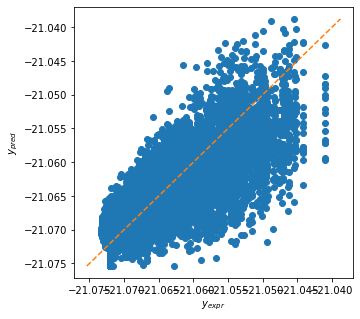

In [40]:
# 当てはめ度合い
plt.figure(figsize=(5,5))
yall = np.hstack([y,yp])
ylim = yall.min(), yall.max()
plt.plot(y,yp,"o")
plt.plot(ylim,ylim,"--")
plt.xlabel("$y_{expr}$")
plt.ylabel("$y_{pred}$")
plt.show()

In [41]:
df.structure.unique()



array(['stishovite'], dtype=object)